In [1]:
getwd()

[1] "/Users/abhavluthra/Desktop/DIC/abhavlutLab1/part2"

### Change File Path to PWD Before Execution

In [149]:
setwd("/Users/abhavluthra/Desktop/DIC/lab1/part2/")

### Import Library

In [2]:
options(warn = -1)
#install.packages("readxl", repos='http://cran.us.r-project.org')
install.packages("tibble", repos='http://cran.us.r-project.org')
install.packages("reshape2", repos='http://cran.us.r-project.org')
install.packages("ggplot2", repos='http://cran.us.r-project.org')
install.packages("rlang", repos='http://cran.us.r-project.org')
install.packages("ggrepel", repos='http://cran.us.r-project.org')
install.packages("RColorBrewer", repos='http://cran.us.r-project.org')
install.packages("maptools", repos='http://cran.us.r-project.org')
install.packages("mapproj", repos='http://cran.us.r-project.org')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
library(mapproj)
library(maptools)
library(ggplot2)
library(readxl)
library(reshape2)
library(dplyr)
library(ggrepel)
library(RColorBrewer)
gpclibPermit()

Loading required package: maps
Loading required package: sp
Checking rgeos availability: FALSE
 	Note: when rgeos is not available, polygon geometry 	computations in maptools depend on gpclib,
 	which has a restricted licence. It is disabled by default;
 	to enable gpclib, type gpclibPermit()

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



[1] FALSE

# 1. Influenza National Summary
## Weekely

In [3]:
positiveWeekClinical <- read_excel("NationalSummary.xlsx")
head(positiveWeekClinical)

Week,Total A,Total B,Percent Positive A,Percent Positive B,Total # Tested,% Positive
201840,218,69,1.32,0.41,16492,1.74
201841,222,81,1.23,0.45,17980,1.68
201842,311,89,1.54,0.44,20128,1.98
201843,337,98,1.58,0.46,21302,2.04
201844,389,98,1.74,0.43,22281,2.18
201845,543,95,2.33,0.40,23304,2.73


In [5]:
meltData <-melt(positiveWeekClinical[,1:3],id.vars="Week")
#head(meltData)
total <- merge(meltData,positiveWeekClinical,by="Week")
total$'Total # Tested' <- NULL
#head(total)

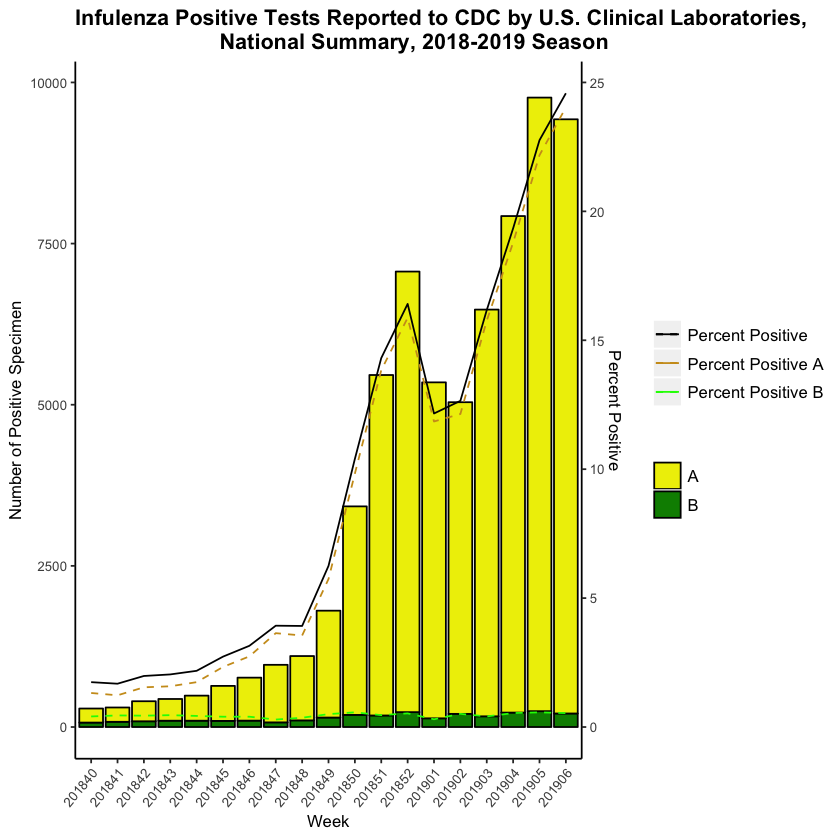

In [6]:
p <- ggplot(total, aes(x = factor(Week)))  

#Barplot
p <-  p + geom_bar(aes(y = value, fill = variable), stat="identity", colour="black") 

# Percentage Graph
p <- p + scale_y_continuous( sec.axis = sec_axis(~ . /400, name = "Percent Positive"))
p <- p + geom_line(aes(y = total$'% Positive'*400, colour = "Percent Positive"),  group = "1")
p <- p + geom_line(aes(y = total$'Percent Positive A'*400, colour = "Percent Positive A"),  group = "1", linetype = 2)
p <- p + geom_line(aes(y = total$'Percent Positive B'*400, colour = "Percent Positive B"), group = "1", linetype = 2)

#Labels and colors
p <- p + scale_fill_manual("", labels = c("A","B"),values = c("yellow2", "green4"))
p <- p + scale_colour_manual("",  breaks = c("Percent Positive", "Percent Positive A", "Percent Positive B"),
                             values = c("black", "goldenrod3", "green"))

p <- p + labs(title = "Infulenza Positive Tests Reported to CDC by U.S. Clinical Laboratories,
                        National Summary, 2018-2019 Season", y = "Number of Positive Specimen",x = "Week") 

#Themes
p <- p + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
               panel.background = element_blank(), axis.line = element_line(colour = "black"), 
               axis.text.x = element_text(angle = 50, hjust = 1))
p <- p + theme(plot.title = element_text(size = 13, face = "bold") , legend.title=element_text(size=7),
                 legend.text=element_text(size=10), text = element_text(size=10))
p

## Yearly

In [8]:
yearly <- read.csv("NationalSummaryAnnual.csv")
yearly <- yearly[yearly$YEAR >= '2018',]
yearly[yearly$WEEK == '1',]$WEEK <- '01'
yearly[yearly$WEEK == '2',]$WEEK <- '02'
yearly[yearly$WEEK == '3',]$WEEK <- '03'
yearly[yearly$WEEK == '4',]$WEEK <- '04'
yearly[yearly$WEEK == '5',]$WEEK <- '05'
yearly[yearly$WEEK == '6',]$WEEK <- '06'
yearly[yearly$WEEK == '7',]$WEEK <- '07'
yearly[yearly$WEEK == '8',]$WEEK <- '08'
yearly[yearly$WEEK == '9',]$WEEK <- '09'
#yearly

In [9]:
yearly$WEEK <- paste0(yearly$YEAR,yearly$WEEK)
yearly$REGION <- NULL
yearly$REGION.TYPE <- NULL
yearly$YEAR <- NULL
yearly$TOTAL.SPECIMENS <- NULL
head(yearly)

,WEEK,TOTAL.A,TOTAL.B,PERCENT.POSITIVE,PERCENT.A,PERCENT.B
14,201801,13018,2535,25.3653,21.2310,4.13432
15,201802,15149,3246,26.9421,22.1879,4.75423
16,201803,14782,3905,27.0340,21.3848,5.64927
17,201804,16634,5350,27.3698,20.7091,6.66069
18,201805,15193,6915,27.0643,18.5990,8.46524
19,201806,14116,7858,26.9981,17.3434,9.65463


In [10]:
meltData <-melt(yearly[,1:3],id.vars="WEEK")
#head(meltData)
total <- merge(meltData,yearly,by="WEEK")
head(total)

WEEK,variable,value,TOTAL.A,TOTAL.B,PERCENT.POSITIVE,PERCENT.A,PERCENT.B
201801,TOTAL.A,13018,13018,2535,25.3653,21.2310,4.13432
201801,TOTAL.B,2535,13018,2535,25.3653,21.2310,4.13432
201802,TOTAL.A,15149,15149,3246,26.9421,22.1879,4.75423
201802,TOTAL.B,3246,15149,3246,26.9421,22.1879,4.75423
201803,TOTAL.B,3905,14782,3905,27.0340,21.3848,5.64927
201803,TOTAL.A,14782,14782,3905,27.0340,21.3848,5.64927


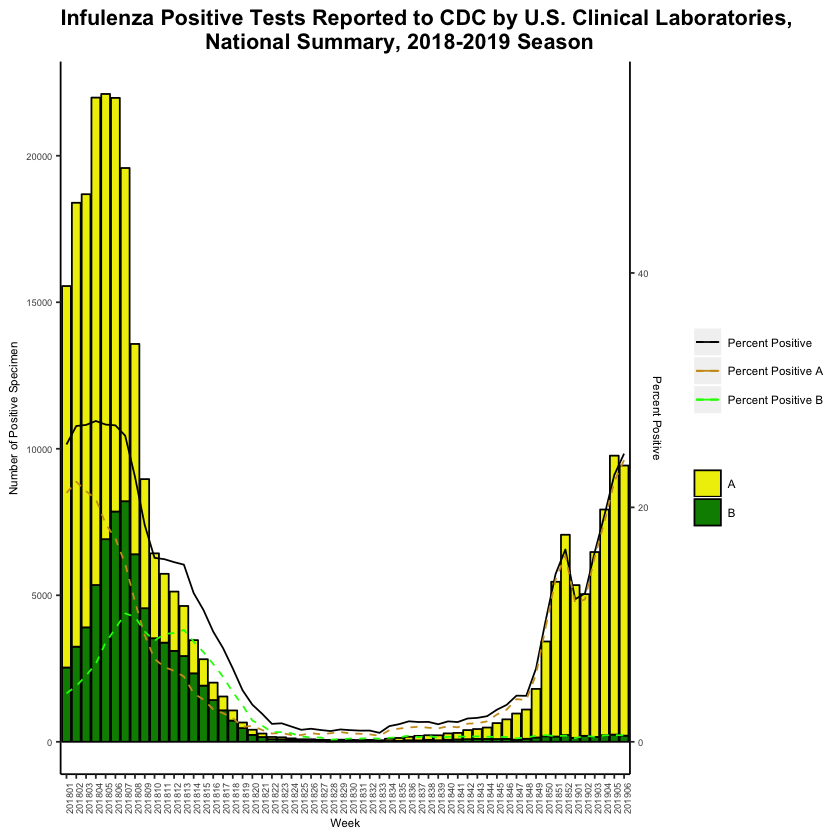

In [14]:
p <- ggplot(total, aes(x = factor(WEEK)))  

#Barplot
p <-  p + geom_bar(aes(y = value, fill = variable), stat="identity", colour="black") 

# Percentage Graph
p <- p + scale_y_continuous( sec.axis = sec_axis(~ . /400, name = "Percent Positive"))
p <- p + geom_line(aes(y = total$PERCENT.POSITIVE*400, colour = "Percent Positive"),  group = "1")
p <- p + geom_line(aes(y = total$PERCENT.A*400, colour = "Percent Positive A"),  group = "1", linetype = 2)
p <- p + geom_line(aes(y = total$PERCENT.B*400, colour = "Percent Positive B"), group = "1", linetype = 2)

#Labels and colors
p <- p + scale_fill_manual("", labels = c("A","B"),values = c("yellow2", "green4"))
p <- p + scale_colour_manual("",  breaks = c("Percent Positive", "Percent Positive A", "Percent Positive B"),
                             values = c("black", "goldenrod3", "green"))

p <- p + labs(title = "Infulenza Positive Tests Reported to CDC by U.S. Clinical Laboratories,
                        National Summary, 2018-2019 Season", y = "Number of Positive Specimen",x = "Week") 

#Themes
p <- p + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
               panel.background = element_blank(), axis.line = element_line(colour = "black"), 
               axis.text.x = element_text(angle = 90, hjust = 1))
p <- p + theme(plot.title = element_text(size = 13, face = "bold") , legend.title=element_text(size=7),
                 legend.text=element_text(size=7), text = element_text(size=7))
p

## NY STATE

In [44]:
NY <- read.csv("NYSummary.csv")
NY$REGION.TYPE <- NULL
NY$REGION <- NULL
NY$WEEK <- paste0(NY$YEAR,NY$WEEK)
NY$YEAR <- NULL
NY$TOTAL.SPECIMENS <- NULL
#head(NY)

In [33]:
meltData <-melt(NY[,1:3],id.vars="WEEK")
#head(meltData)
total <- merge(meltData,NY,by="WEEK")
total$'Total # Tested' <- NULL
head(total)

WEEK,variable,value,TOTAL.A,TOTAL.B,PERCENT.POSITIVE,PERCENT.A,PERCENT.B
201840,TOTAL.A,5,5,2,0.48,0.34,0.14
201840,TOTAL.B,2,5,2,0.48,0.34,0.14
201841,TOTAL.A,7,7,1,0.40,0.35,0.05
201841,TOTAL.B,1,7,1,0.40,0.35,0.05
201842,TOTAL.A,7,7,0,0.34,0.34,0.00
201842,TOTAL.B,0,7,0,0.34,0.34,0.00


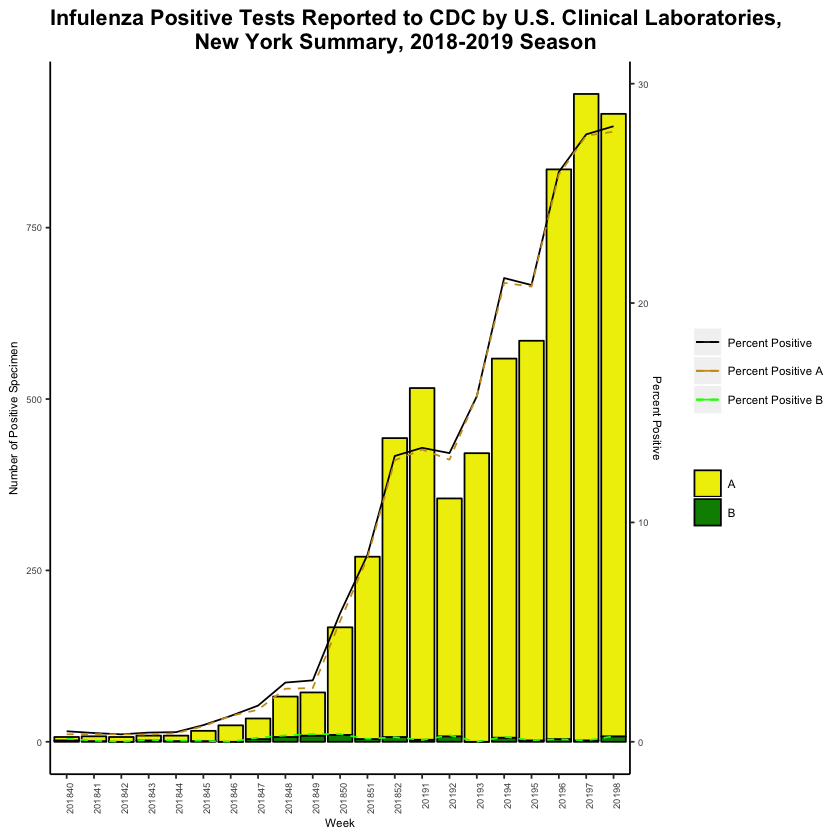

In [43]:
p <- ggplot(total, aes(x = factor(WEEK)))  

#Barplot
p <-  p + geom_bar(aes(y = value, fill = variable), stat="identity", colour="black") 

# Percentage Graph
p <- p + scale_y_continuous( sec.axis = sec_axis(~ . /32, name = "Percent Positive"))
p <- p + geom_line(aes(y = total$PERCENT.POSITIVE*32, colour = "Percent Positive"),  group = "1")
p <- p + geom_line(aes(y = total$PERCENT.A*32, colour = "Percent Positive A"),  group = "1", linetype = 2)
p <- p + geom_line(aes(y = total$PERCENT.B*32, colour = "Percent Positive B"), group = "1", linetype = 2)

#Labels and colors
p <- p + scale_fill_manual("", labels = c("A","B"),values = c("yellow2", "green4"))
p <- p + scale_colour_manual("",  breaks = c("Percent Positive", "Percent Positive A", "Percent Positive B"),
                             values = c("black", "goldenrod3", "green"))

p <- p + labs(title = "Infulenza Positive Tests Reported to CDC by U.S. Clinical Laboratories,
                        New York Summary, 2018-2019 Season", y = "Number of Positive Specimen",x = "Week") 

#Themes
p <- p + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
               panel.background = element_blank(), axis.line = element_line(colour = "black"), 
               axis.text.x = element_text(angle = 90, hjust = 1))
p <- p + theme(plot.title = element_text(size = 13, face = "bold") , legend.title=element_text(size=7),
                 legend.text=element_text(size=7), text = element_text(size=7))
p

# 2. Positive Test
## Weekly

In [139]:
positiveWeekPublic <- read_excel("PositiveTests.xlsx")

In [140]:
positiveWeekPublic$'A(unable to sub-type)' <- NULL
positiveWeekPublic$'Total # Tested' <- NULL

In [141]:
total <-melt(positiveWeekPublic,id.vars="Week")
head(total)
#tail(total)

Week,variable,value
201840,A(H3N2v),0
201841,A(H3N2v),0
201842,A(H3N2v),0
201843,A(H3N2v),0
201844,A(H3N2v),0
201845,A(H3N2v),0


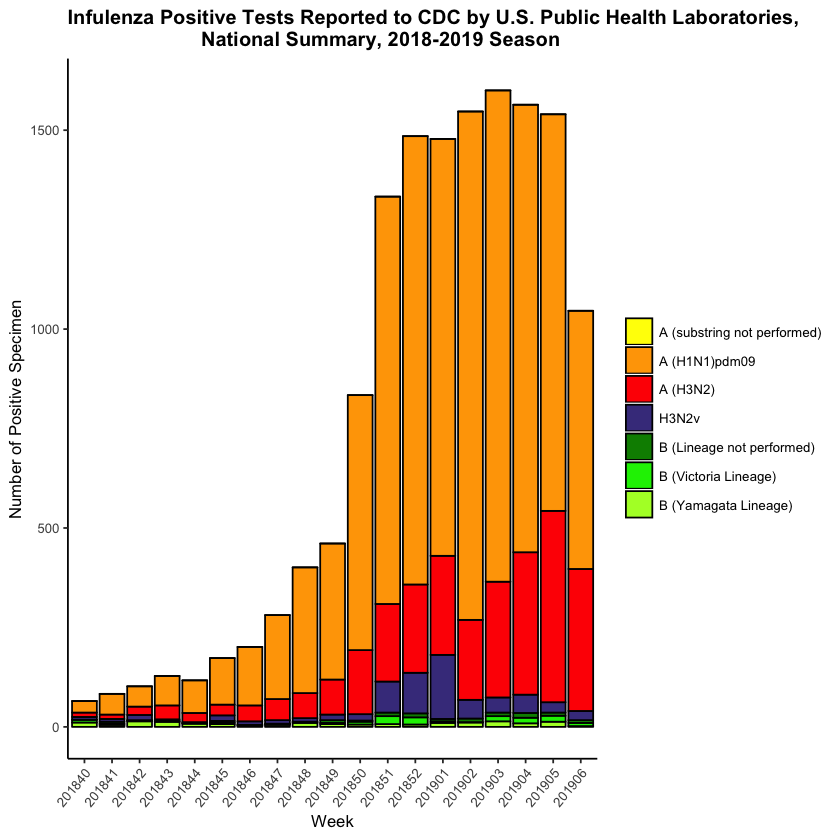

In [13]:
p <- ggplot(total, aes(x = factor(Week)))

#Barplot
p <-  p + geom_bar(aes(y = value, fill = variable), stat="identity", colour="black") 

#Labels and colors
p   <- p + scale_fill_manual("", labels = c("A (substring not performed)","A (H1N1)pdm09","A (H3N2)",
                "H3N2v","B (Lineage not performed)","B (Victoria Lineage)","B (Yamagata Lineage)"),
                values = c("yellow", "orange", "red", "slateblue4", "green4", "green2", "greenyellow"))
p <- p + labs(title = "Infulenza Positive Tests Reported to CDC by U.S. Public Health Laboratories,
                        National Summary, 2018-2019 Season", y = "Number of Positive Specimen",x = "Week") 
#Themes
p <- p + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
               panel.background = element_blank(), axis.line = element_line(colour = "black"), 
               axis.text.x = element_text(angle = 50, hjust = 1))
p <- p + theme(plot.title = element_text(size = 12, face = "bold") , legend.title=element_text(size=7),
                 legend.text=element_text(size=8), text = element_text(size=10))
p

## Yearly

In [136]:
yearly <- read.csv("PositiveTestsAnnual.csv")

In [138]:
yearly <- yearly[yearly$YEAR >= '2018',]
yearly[yearly$WEEK == '1',]$WEEK <- '01'
yearly[yearly$WEEK == '2',]$WEEK <- '02'
yearly[yearly$WEEK == '3',]$WEEK <- '03'
yearly[yearly$WEEK == '4',]$WEEK <- '04'
yearly[yearly$WEEK == '5',]$WEEK <- '05'
yearly[yearly$WEEK == '6',]$WEEK <- '06'
yearly[yearly$WEEK == '7',]$WEEK <- '07'
yearly[yearly$WEEK == '8',]$WEEK <- '08'
yearly[yearly$WEEK == '9',]$WEEK <- '09'
yearly$REGION.TYPE <- NULL
yearly$REGION <- NULL
yearly$WEEK <- paste0(yearly$YEAR,yearly$WEEK)
yearly$YEAR <- NULL
yearly$TOTAL.SPECIMENS <- NULL

head(yearly)

,WEEK,A..2009.H1N1.,A..H3.,A..Subtyping.not.Performed.,B,BVic,BYam,H3N2v
14,201801,320,3295,39,165,45,463,0
15,201802,393,3336,70,163,42,534,0
16,201803,406,2727,50,189,47,536,0
17,201804,540,2749,38,231,58,718,0
18,201805,542,2494,41,306,91,804,0
19,201806,544,2040,32,329,113,931,0


In [142]:
total <-melt(yearly,id.vars="WEEK")
head(total)

WEEK,variable,value
201801,A..2009.H1N1.,320
201802,A..2009.H1N1.,393
201803,A..2009.H1N1.,406
201804,A..2009.H1N1.,540
201805,A..2009.H1N1.,542
201806,A..2009.H1N1.,544


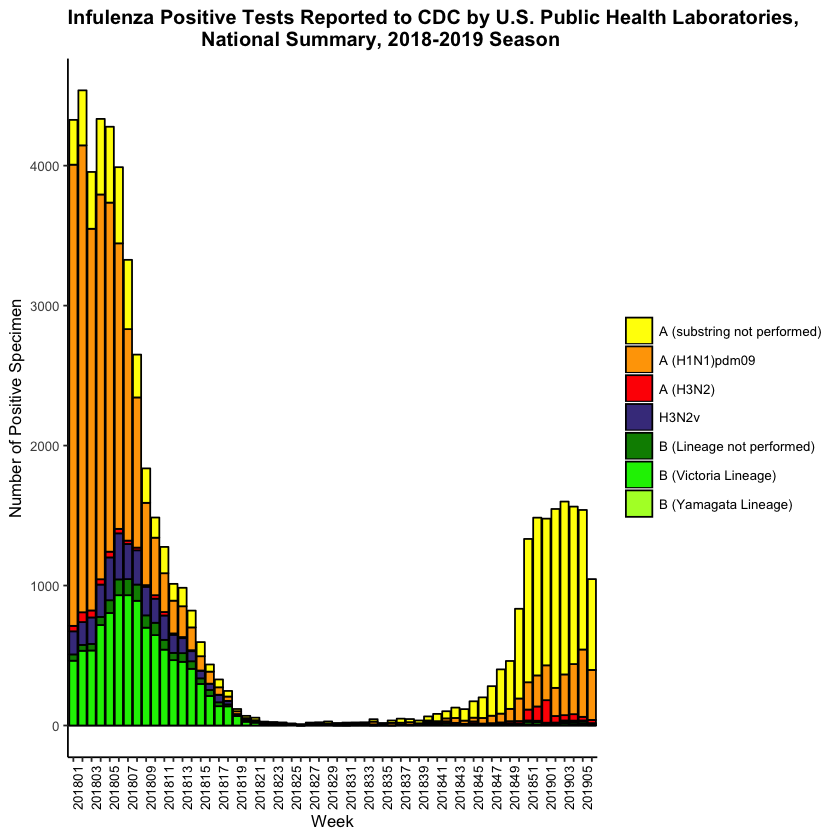

In [148]:
p <- ggplot(total, aes(x = factor(WEEK)))

#Barplot
p <-  p + geom_bar(aes(y = value, fill = variable), stat="identity", colour="black") 

#Labels and colors
p   <- p + scale_fill_manual("", labels = c("A (substring not performed)","A (H1N1)pdm09","A (H3N2)",
                "H3N2v","B (Lineage not performed)","B (Victoria Lineage)","B (Yamagata Lineage)"),
                values = c("yellow", "orange", "red", "slateblue4", "green4", "green2", "greenyellow"))
p <- p + labs(title = "Infulenza Positive Tests Reported to CDC by U.S. Public Health Laboratories,
                        National Summary, 2018-2019 Season", y = "Number of Positive Specimen",x = "Week") 
#Themes
p <- p + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
               panel.background = element_blank(), axis.line = element_line(colour = "black"), 
               axis.text.x = element_text(angle = 90, hjust = 1))
p <- p + theme(axis.text.x=element_text(color=c("black","transparent")))

p <- p + theme(plot.title = element_text(size = 12, face = "bold") , legend.title=element_text(size=7),
                 legend.text=element_text(size=8), text = element_text(size=10))
p

# 3. Influenza Virus Characterization

## Don't Consider for Grading (Extra)

In [14]:
#names(positiveWeekPublic)

[1] "Week"                       "A(H3N2v)"                  
[3] "A (H1N1)pdm09"              "A(H3)"                     
[5] "A(Subtyping not performed)" "B "                        
[7] "BVIC"                       "BYAM"

In [15]:
names(positiveWeekPublic)[6] <- 'B'

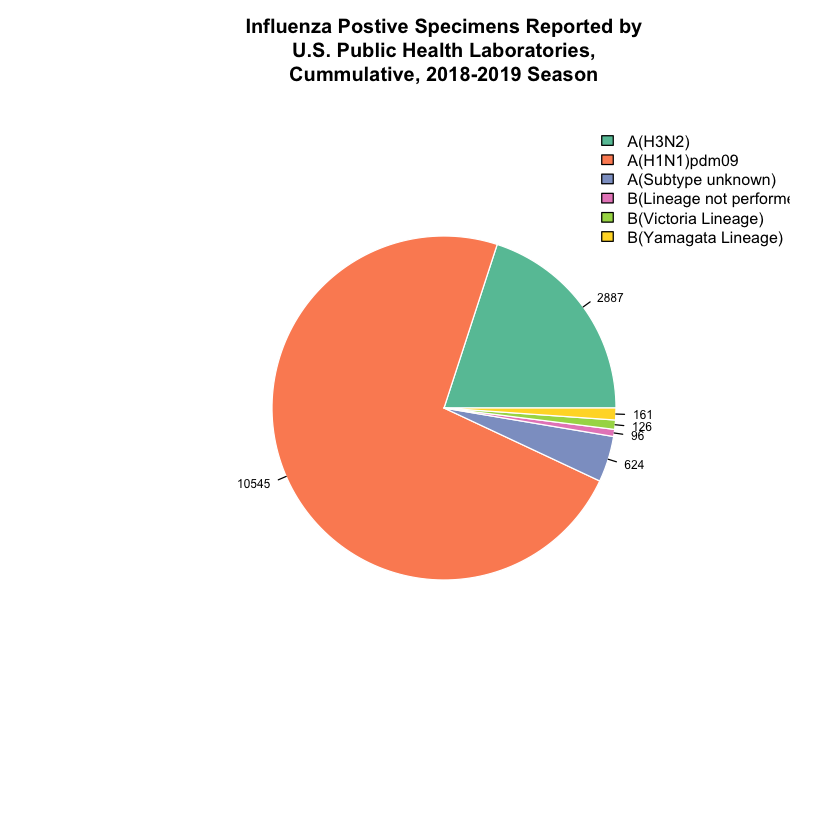

In [16]:
df <- data.frame(
  group = c("A(H3N2)", "A(H1N1)pdm09","A(Subtype unknown)","B(Lineage not performed)",
            "B(Victoria Lineage)", "B(Yamagata Lineage)"),
  value = c(sum(positiveWeekPublic$'A(H3)'), sum(positiveWeekPublic$'A (H1N1)pdm09')
            ,sum(positiveWeekPublic$'A(Subtyping not performed)'),sum(positiveWeekPublic$'B'),
           sum(positiveWeekPublic$'BVIC'),sum(positiveWeekPublic$'BYAM')))

p <- pie(df$value, labels = df$value, col=brewer.pal(6,"Set2"),border="white", radius=0.6,cex=0.6)

p <- p + title(main="Influenza Postive Specimens Reported by
U.S. Public Health Laboratories,
Cummulative, 2018-2019 Season", cex.main=1)

legend(0.5, 1,,legend=df$group, bty="n",cex=0.8,fill=brewer.pal(6,"Set2"))



# 4. Influenza Heat Map

In [1]:
HeatMap <- read.csv("HeatMap.csv")

In [2]:
HeatMap$URL <- NULL
HeatMap$WEBSITE <- NULL
names(HeatMap)
HeatMap$STATENAME <- tolower(HeatMap$STATENAME)
head(HeatMap)

[1] "STATENAME"            "ACTIVITY.LEVEL"       "ACTIVITY.LEVEL.LABEL"
[4] "WEEKEND"              "WEEK"                 "SEASON"

STATENAME,ACTIVITY.LEVEL,ACTIVITY.LEVEL.LABEL,WEEKEND,WEEK,SEASON
alabama,Level 10,High,Jan-19-2019,3,2018-19
alaska,Level 4,Low,Jan-19-2019,3,2018-19
arizona,Level 6,Moderate,Jan-19-2019,3,2018-19
arkansas,Level 5,Low,Jan-19-2019,3,2018-19
california,Level 4,Low,Jan-19-2019,3,2018-19
colorado,Level 9,High,Jan-19-2019,3,2018-19


In [3]:
library(tidyr)
HeatMap <- HeatMap %>% separate(ACTIVITY.LEVEL,
                c("Key", "ACTIVITY.LEVEL"))
HeatMap$Key <- NULL

In [6]:
#sapply(HeatMap, mode)
HeatMap1 <- transform(HeatMap, ACTIVITY.LEVEL = as.numeric(as.character(ACTIVITY.LEVEL)))
#sapply(HeatMap1, mode)
head(HeatMap1)
HeatMap1 <- HeatMap1[55:108,]
write.csv(HeatMap1, file = "HeatMapGraph.csv", row.names=FALSE, na="")

STATENAME,ACTIVITY.LEVEL,ACTIVITY.LEVEL.LABEL,WEEKEND,WEEK,SEASON
alabama,10,High,Jan-19-2019,3,2018-19
alaska,4,Low,Jan-19-2019,3,2018-19
arizona,6,Moderate,Jan-19-2019,3,2018-19
arkansas,5,Low,Jan-19-2019,3,2018-19
california,4,Low,Jan-19-2019,3,2018-19
colorado,9,High,Jan-19-2019,3,2018-19


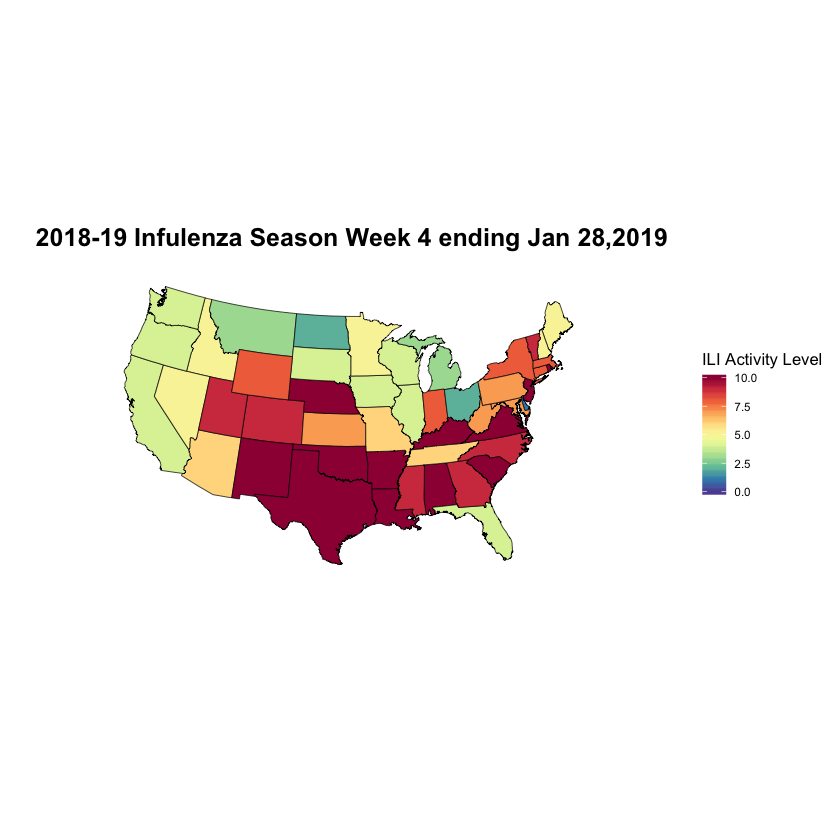

In [10]:
myPalette <- colorRampPalette(rev(brewer.pal(11, "Spectral")))

us <- map_data("state")
p <- ggplot()
p <- p + geom_map(data=us, map=us,aes(x = long, y = lat, map_id=region),
                    fill="#ffffff", color="#ffffff", size=0.8)
p <- p + geom_map(data=HeatMap1, map=us, aes(fill=ACTIVITY.LEVEL, map_id=STATENAME),
                    color="black", size=0.2)
p <- p + labs(x="", y="", fill ="ILI Activity Level", title = "2018-19 Infulenza Season Week 4 ending Jan 28,2019")
p <- p + coord_map("albers", lat0 = 39, lat1 = 45) 
p <- p + theme(panel.border = element_blank(), panel.background = element_blank(), axis.ticks = element_blank(),
                axis.text = element_blank(), legend.key.size =  unit(0.2, "in"))
p <- p + theme(plot.title = element_text(size = 15, face = "bold") , legend.title=element_text(size=10),
                 legend.text=element_text(size=7))
p <- p + scale_fill_gradientn(colours = myPalette(10), limits=c(0,10))
p

# 5. Mortality

## Don't Consider for Grading (Extra)

In [25]:
mortality <- read_excel("Mortality.xlsx")

In [26]:
mortality <- mortality[mortality$'Year' > '2013',]
mortality <- mortality[mortality$'Week' > 39,]
mortality$'All Deaths' <- NULL
mortality$'Pneumonia Deaths' <- NULL
mortality$'Influenza Deaths' <- NULL


In [27]:
mortality$Year <- as.character(mortality$Year)
mortality$Week <- as.character(mortality$Week)
mortality$WY <- paste(mortality$Year,mortality$Week, sep='-')
mortality$Year <- NULL
mortality$Week <- NULL

In [28]:
head(mortality)

Percent of Deaths Due to Pneumonia and Influenza,Expected,Threshold,WY
6.370177,6.23541,6.63414,2014-40
6.381686,6.32322,6.72176,2014-41
6.291888,6.42025,6.81859,2014-42
6.547655,6.52503,6.92318,2014-43
6.470504,6.63602,7.03397,2014-44
6.305706,6.75156,7.14932,2014-45


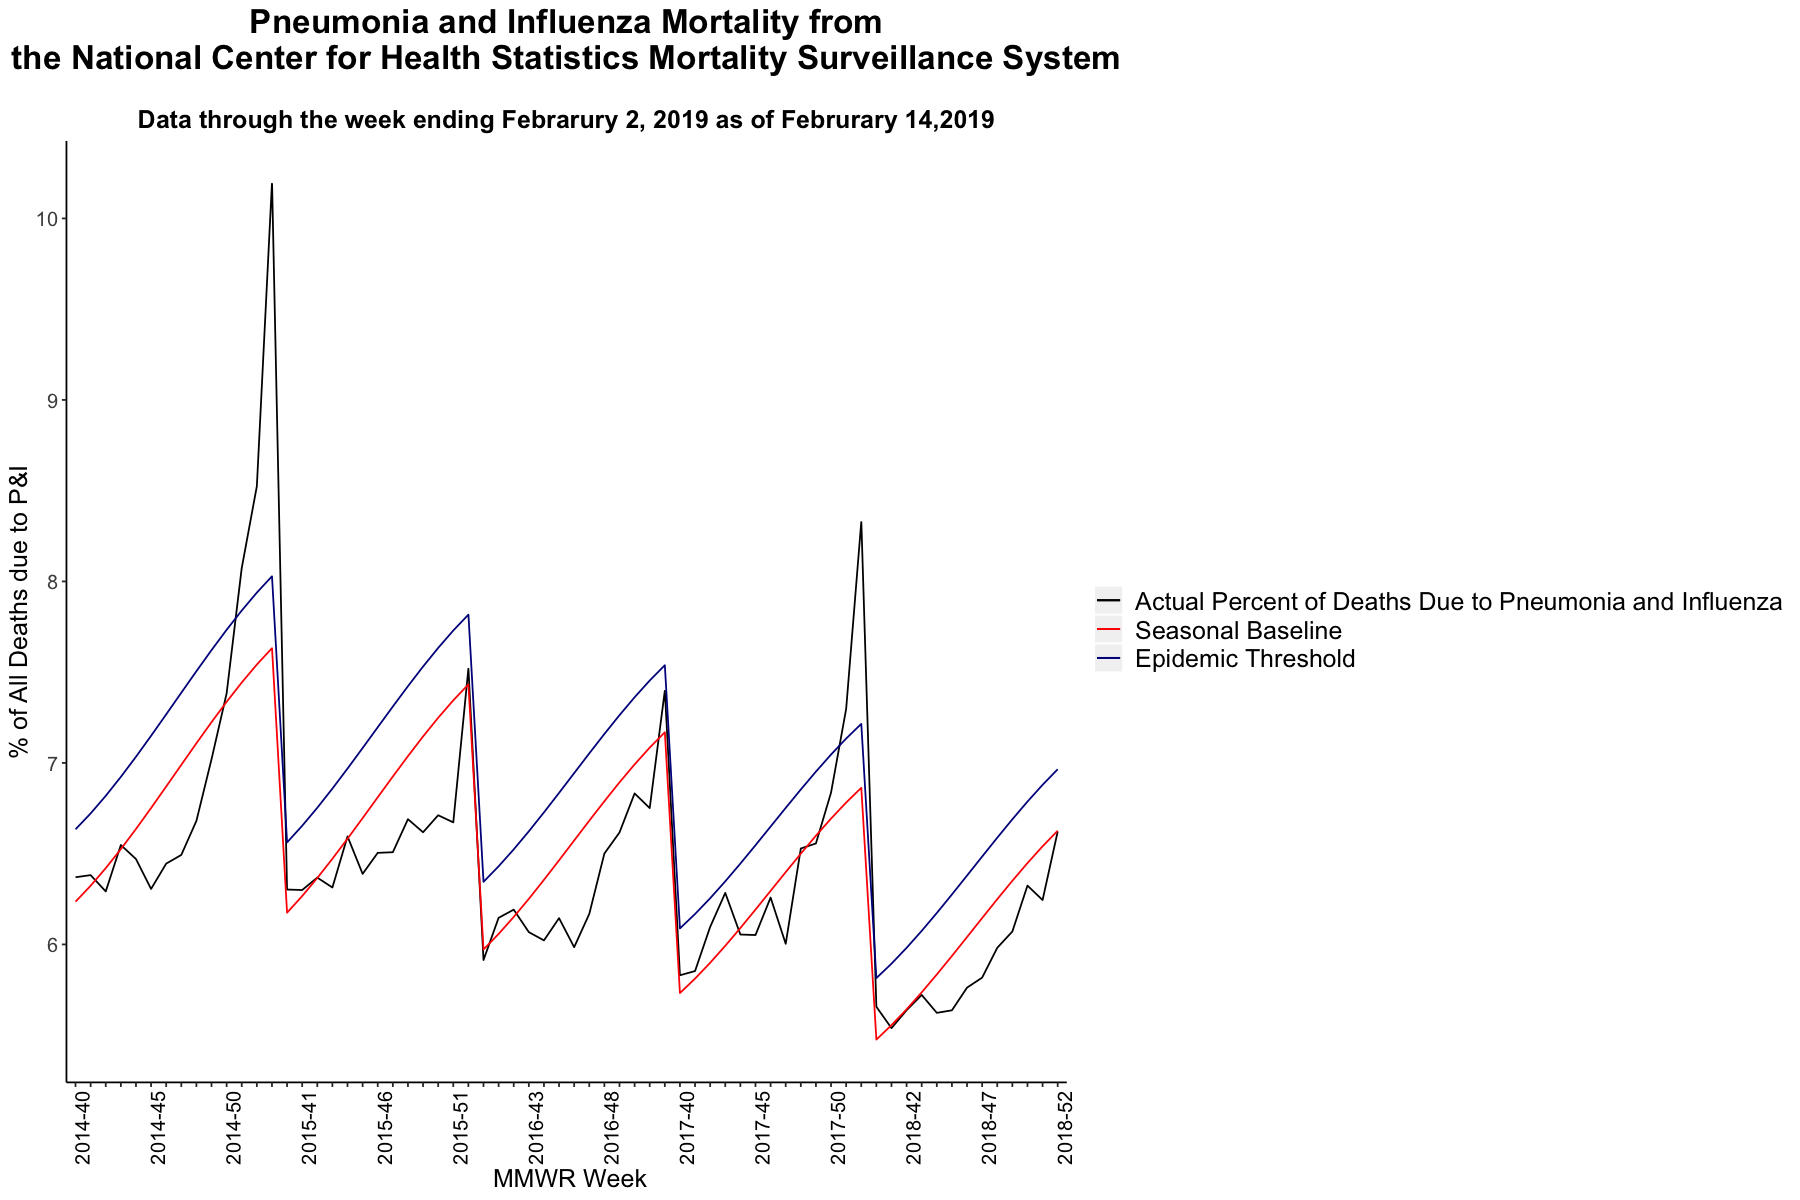

In [29]:
options(repr.plot.width=15, repr.plot.height=10)
p <- ggplot(mortality, aes(x = factor(WY)))  

# Percentage Graph
p <- p + geom_line(aes(y = mortality$'Percent of Deaths Due to Pneumonia and Influenza', colour = 'Actual Percent of Deaths Due to Pneumonia and Influenza'),  group = "1")
p <- p + geom_line(aes(y = mortality$'Expected', colour = 'Seasonal Baseline'),  group = "1")
p <- p + geom_line(aes(y = mortality$'Threshold', colour = 'Epidemic Threshold'), group = "1")

#Labels and colors
p <- p + scale_colour_manual("", breaks = c("Actual Percent of Deaths Due to Pneumonia and Influenza",
                                                   "Seasonal Baseline", "Epidemic Threshold"),
                                 values = c("black", "darkblue", "red"))
p <- p + labs(title = "Pneumonia and Influenza Mortality from
the National Center for Health Statistics Mortality Surveillance System",
              subtitle = "
Data through the week ending Febrarury 2, 2019 as of Februrary 14,2019",
              y = "% of All Deaths due to P&I",x = " MMWR Week") 

#Themes
p <- p + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
               panel.background = element_blank(), axis.line = element_line(colour = "black"), 
               axis.text.x = element_text(angle = 90, hjust = 1))
p <- p + theme(axis.text.x=element_text(color=c("black","transparent","transparent","transparent","transparent")))
p <- p + theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5) , legend.title=element_text(size=15),
               plot.subtitle = element_text(size = 15, face = "bold", hjust = 0.5),legend.text=element_text(size=15), text = element_text(size=15))

p

# 6. Pediatric Deaths

In [28]:
PediatricDeaths <- read.csv("PediatricDeaths.csv")
PediatricDeathsTotals <- PediatricDeaths
PediatricDeaths$'NO..OF.DEATHS' <- NULL
PediatricDeaths$'SEASON' <- NULL

In [29]:
#head(PediatricDeaths)

In [30]:
meltData <-melt(PediatricDeaths,id.vars="WEEK.NUMBER")
#head(meltData)
#tail(meltData)

In [31]:
sum(PediatricDeathsTotals[PediatricDeathsTotals$SEASON == '2015-16',]$NO..OF.DEATHS)
sum(PediatricDeathsTotals[PediatricDeathsTotals$SEASON == '2016-17',]$NO..OF.DEATHS)
sum(PediatricDeathsTotals[PediatricDeathsTotals$SEASON == '2017-18',]$NO..OF.DEATHS)
sum(PediatricDeathsTotals[PediatricDeathsTotals$SEASON == '2018-19',]$NO..OF.DEATHS)

[1] 94

[1] 110

[1] 185

[1] 34

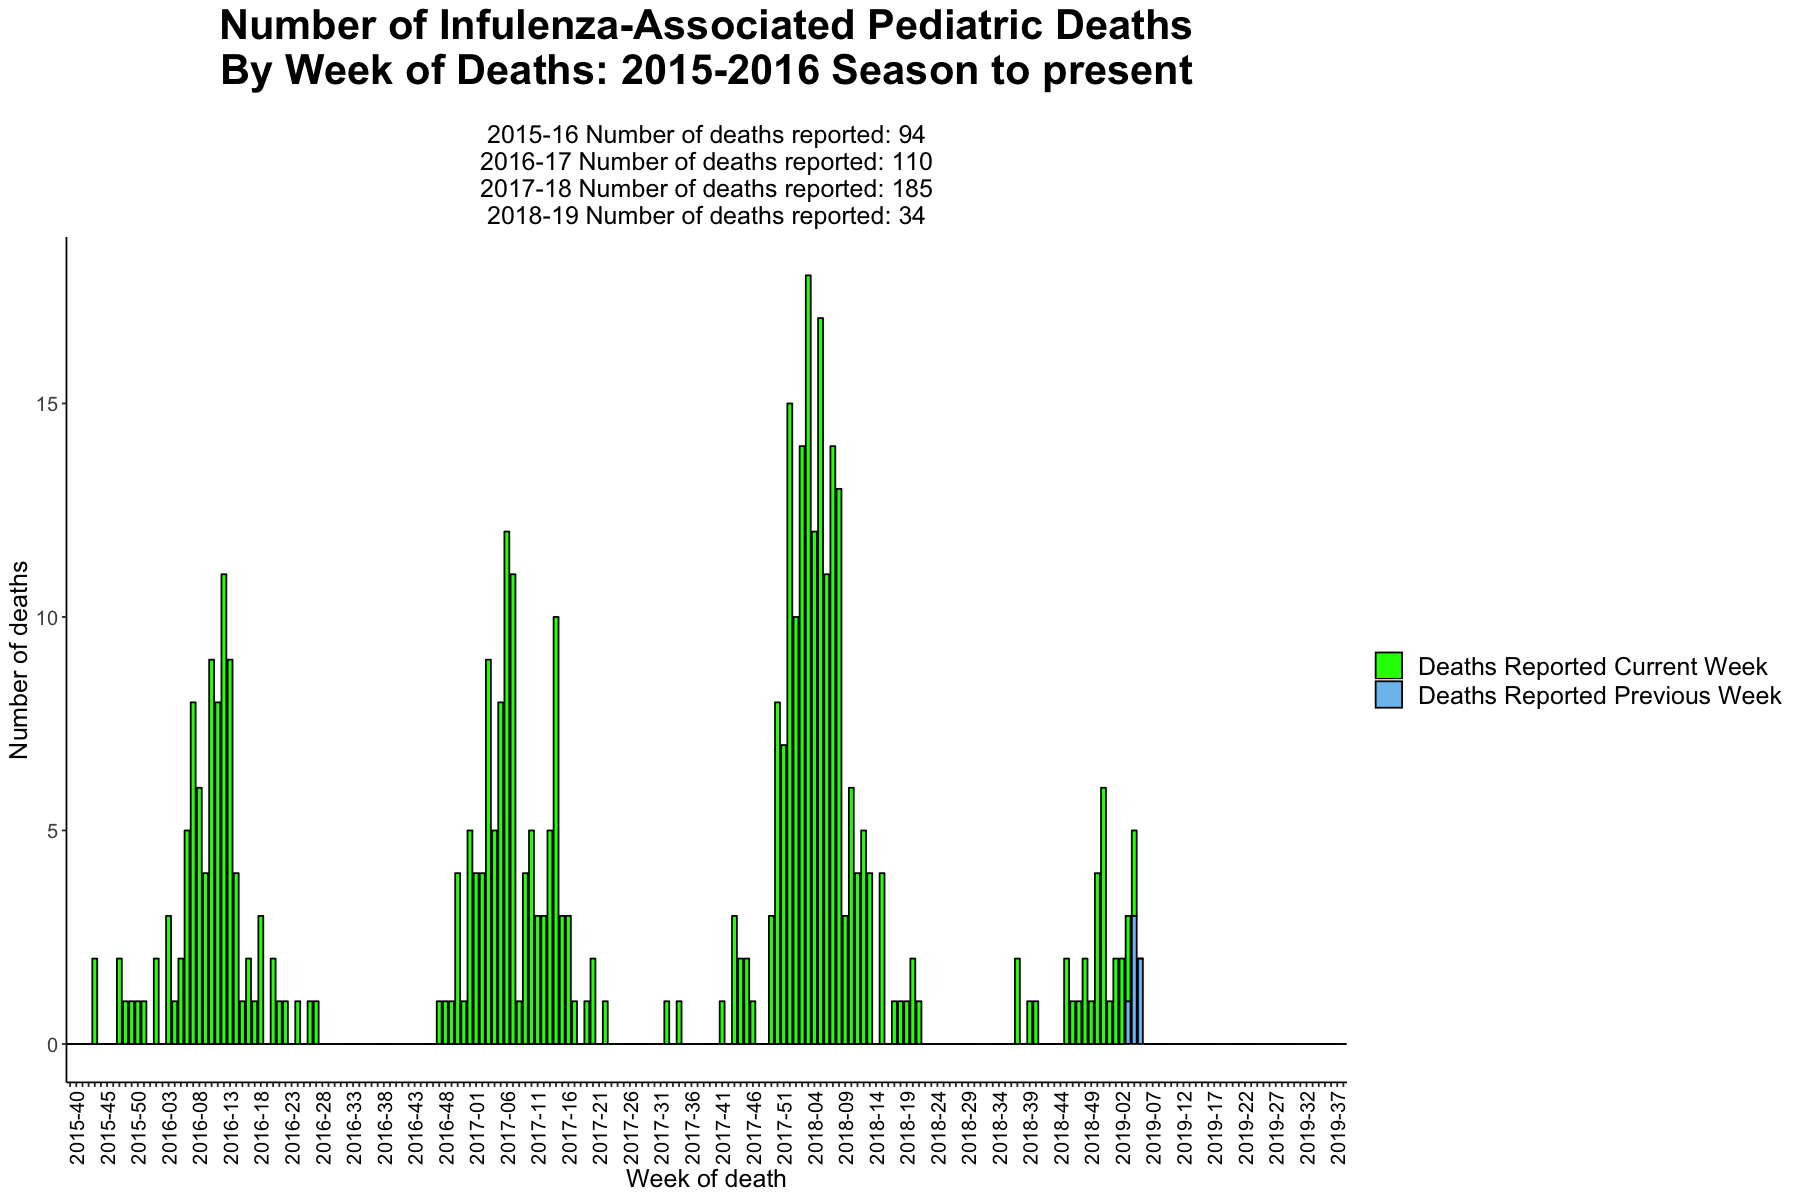

In [32]:
options(repr.plot.width=15, repr.plot.height=10)

p <- ggplot(meltData, aes(x =WEEK.NUMBER), width=1) 

p <- p + geom_bar(aes(y = value, fill = variable), stat="identity",width = 0.8, colour="black") 

p <- p + scale_fill_manual(name = "",labels = c("Deaths Reported Current Week", "Deaths Reported Previous Week"),
                           values = c("green", "skyblue2"))

p <- p + labs(title = "Number of Infulenza-Associated Pediatric Deaths
By Week of Deaths: 2015-2016 Season to present",subtitle = "
2015-16 Number of deaths reported: 94
2016-17 Number of deaths reported: 110
2017-18 Number of deaths reported: 185
2018-19 Number of deaths reported: 34", y = "Number of deaths",
              x = "Week of death") 

p <- p + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
               panel.background = element_blank(), axis.line = element_line(colour = "black"), 
               axis.text.x = element_text(angle = 90, hjust = 1))

p <- p + theme(axis.text.x=element_text(color=c("black","transparent","transparent","transparent","transparent")))

p <- p + theme(plot.title = element_text(size = 25, face = "bold", hjust = 0.5) ,
               plot.subtitle = element_text(size = 15, hjust = 0.5), legend.title=element_text(size=18),
               legend.text=element_text(size=15), text = element_text(size=15))
p



# 7. Influenza Like Illness

In [16]:
ILI <- read.csv("ILI.csv", sep = ",")
#ILI

In [17]:
x <- data.frame(YEAR = ILI$YEAR, WEEK = ILI$WEEK, PERCENT = ILI$ILITOTAL*100/ILI$TOTAL.PATIENTS)
#head(x)
#tail(x)

In [18]:
P2009 <- x[x$'YEAR' == '2009',]
P2010 <- x[x$'YEAR' == '2010',]
P2011 <- x[x$'YEAR' == '2011',]
P2012 <- x[x$'YEAR' == '2012',]
P2013 <- x[x$'YEAR' == '2013',]
P2014 <- x[x$'YEAR' == '2014',]
P2015 <- x[x$'YEAR' == '2015',]
P2016 <- x[x$'YEAR' == '2016',]
P2017 <- x[x$'YEAR' == '2017',]
P2018 <- x[x$'YEAR' == '2018',]
P2019 <- x[x$'YEAR' == '2019',]

In [19]:
P200910 <- rbind(P2009[P2009$WEEK > 39,], P2010[P2010$WEEK < 40,])
P201011 <- rbind(P2010[P2010$WEEK > 39,], P2011[P2011$WEEK < 40,])
P201112 <- rbind(P2011[P2011$WEEK > 39,], P2012[P2012$WEEK < 40,])
P201213 <- rbind(P2012[P2012$WEEK > 39,], P2013[P2013$WEEK < 40,])
P201314 <- rbind(P2013[P2013$WEEK > 39,], P2014[P2014$WEEK < 40,])
P201415 <- rbind(P2014[P2014$WEEK > 39,], P2015[P2015$WEEK < 40,])
P201516 <- rbind(P2015[P2015$WEEK > 39,], P2016[P2016$WEEK < 40,])
P201617 <- rbind(P2016[P2016$WEEK > 39,], P2017[P2017$WEEK < 40,])
P201718 <- rbind(P2017[P2017$WEEK > 39,], P2018[P2018$WEEK < 40,])
P201819 <- rbind(P2018[P2018$WEEK > 39,], P2019[P2019$WEEK < 40,])

In [20]:
P201415 <- subset(P201415, WEEK!= 53)
P200910$YEAR <- NULL
P201011$YEAR <- NULL
P201011$WEEK <- NULL
P201112$YEAR <- NULL
P201112$WEEK <- NULL
P201213$YEAR <- NULL
P201213$WEEK <- NULL
P201314$YEAR <- NULL
P201314$WEEK <- NULL
P201415$YEAR <- NULL
P201415$WEEK <- NULL
P201516$YEAR <- NULL
P201516$WEEK <- NULL
P201617$YEAR <- NULL
P201617$WEEK <- NULL
P201718$YEAR <- NULL
P201718$WEEK <- NULL
P201819$YEAR <- NULL

In [21]:
total <- cbind(P200910, P201011, P201112, P201213, P201314, P201415, P201516, P201617, P201718)

In [22]:
colnames(total)[2] <- "2009-10"
colnames(total)[3] <- "2010-11"
colnames(total)[4] <- "2011-12"
colnames(total)[5] <- "2012-13"
colnames(total)[6] <- "2013-14"
colnames(total)[7] <- "2014-15"
colnames(total)[8] <- "2015-16"
colnames(total)[9] <- "2016-17"
colnames(total)[10] <- "2017-18"

In [23]:
total <- merge(total, P201819, x.by = 'WEEK', all.x = TRUE)

In [24]:
colnames(total)[11] <- "2018-19"

In [25]:
total <- rbind(total[40:52,], total[1:39,])

In [26]:
head(total)

,WEEK,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19
40,40,5.660867,1.135053,1.203446,1.205592,1.132492,1.206122,1.243247,1.273858,1.280198,1.419652
41,41,6.815222,1.252563,1.237773,1.319291,1.211208,1.324854,1.323395,1.293418,1.331233,1.473521
42,42,7.618892,1.245696,1.252586,1.327366,1.256816,1.411921,1.403987,1.330975,1.407859,1.586577
43,43,7.388359,1.267738,1.305461,1.366879,1.370972,1.425467,1.376292,1.426622,1.572198,1.741808
44,44,6.339272,1.437229,1.452952,1.505346,1.429556,1.439094,1.468657,1.570710,1.703255,1.839989
45,45,4.943495,1.533412,1.440892,1.612733,1.535879,1.615320,1.532997,1.651462,1.866359,1.928375


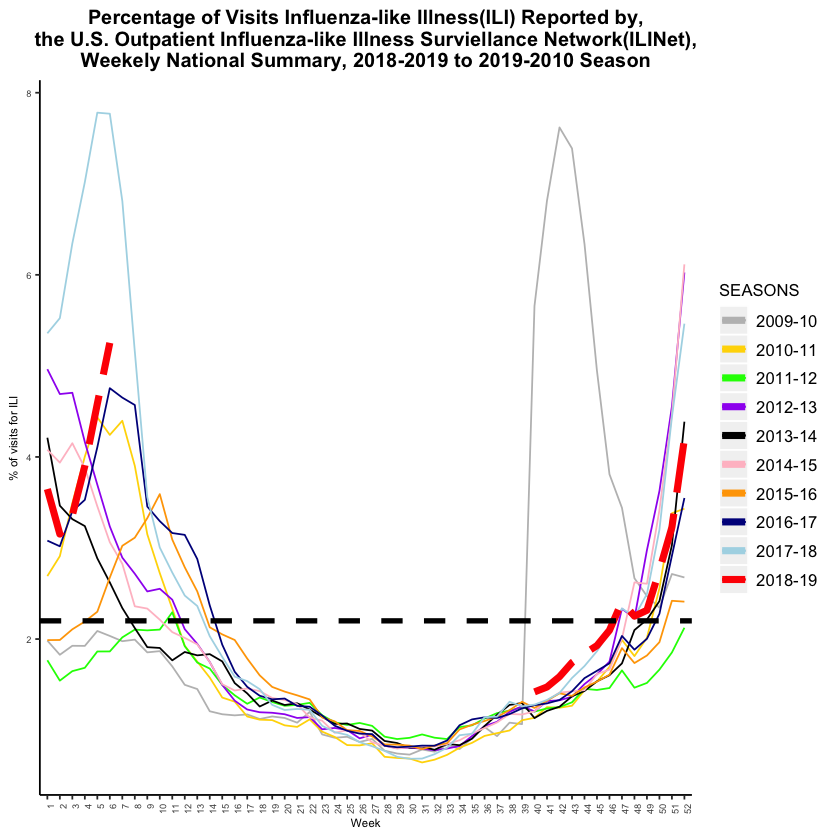

In [27]:
p <- ggplot(total, aes(x = factor(WEEK)))  

# Percentage Graph
p <- p + geom_line(aes(y = total$"2009-10", colour = "2009-10"),  group = "1")
p <- p + geom_line(aes(y = total$"2010-11", colour = "2010-11"),  group = "1")
p <- p + geom_line(aes(y = total$"2011-12", colour = "2011-12"), group = "1")
p <- p + geom_line(aes(y = total$"2012-13", colour = "2012-13"), group = "1")
p <- p + geom_line(aes(y = total$"2013-14", colour = "2013-14"), group = "1")
p <- p + geom_line(aes(y = total$"2014-15", colour = "2014-15"), group = "1")
p <- p + geom_line(aes(y = total$"2015-16", colour = "2015-16"), group = "1")
p <- p + geom_line(aes(y = total$"2016-17", colour = "2016-17"), group = "1")
p <- p + geom_line(aes(y = total$"2017-18", colour = "2017-18"), group = "1")
p <- p + geom_line(aes(y = total$"2018-19", colour = "2018-19"), group = "1",size = 2, linetype = "longdash")
p <- p + geom_hline(yintercept = 2.2, linetype = "dashed", color = "black", size = 1.5)

#Labels and colors
p <- p + scale_colour_manual("SEASONS", breaks = c("2009-10", "2010-11", "2011-12", "2012-13", "2013-14", "2014-15",
                                             "2015-16", "2016-17", "2017-18", "2018-19"),
                                 values = c("grey", "gold", "green", "purple", "black","pink", "orange", "darkblue",
                                        "lightblue","red"))
p <- p + labs(title = "Percentage of Visits Influenza-like Illness(ILI) Reported by,
the U.S. Outpatient Influenza-like Illness Surviellance Network(ILINet),
Weekely National Summary, 2018-2019 to 2019-2010 Season",
              y = "% of visits for ILI",x = "Week") 

#Themes
p <- p + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
               panel.background = element_blank(), axis.line = element_line(colour = "black"), 
               axis.text.x = element_text(angle = 90, hjust = 1))
p <- p + theme(plot.title = element_text(size = 12, face = "bold", hjust = 0.5) , legend.title=element_text(size=10),
                 legend.text=element_text(size=10), text = element_text(size=7))
p

Extra

In [28]:
write.csv(total, file = "totaltry.csv")

In [29]:
totaltry <- read.csv("totaltry.csv", sep = ",")
totaltry$X <- NULL
p  = as.data.frame(seq(1, 52, by=1))
totaltry <- cbind(p, totaltry)

In [30]:
head(totaltry)

"seq(1, 52, by = 1)",WEEK,X2009.10,X2010.11,X2011.12,X2012.13,X2013.14,X2014.15,X2015.16,X2016.17,X2017.18,X2018.19
1,40,5.660867,1.135053,1.203446,1.205592,1.132492,1.206122,1.243247,1.273858,1.280198,1.419652
2,41,6.815222,1.252563,1.237773,1.319291,1.211208,1.324854,1.323395,1.293418,1.331233,1.473521
3,42,7.618892,1.245696,1.252586,1.327366,1.256816,1.411921,1.403987,1.330975,1.407859,1.586577
4,43,7.388359,1.267738,1.305461,1.366879,1.370972,1.425467,1.376292,1.426622,1.572198,1.741808
5,44,6.339272,1.437229,1.452952,1.505346,1.429556,1.439094,1.468657,1.570710,1.703255,1.839989
6,45,4.943495,1.533412,1.440892,1.612733,1.535879,1.615320,1.532997,1.651462,1.866359,1.928375


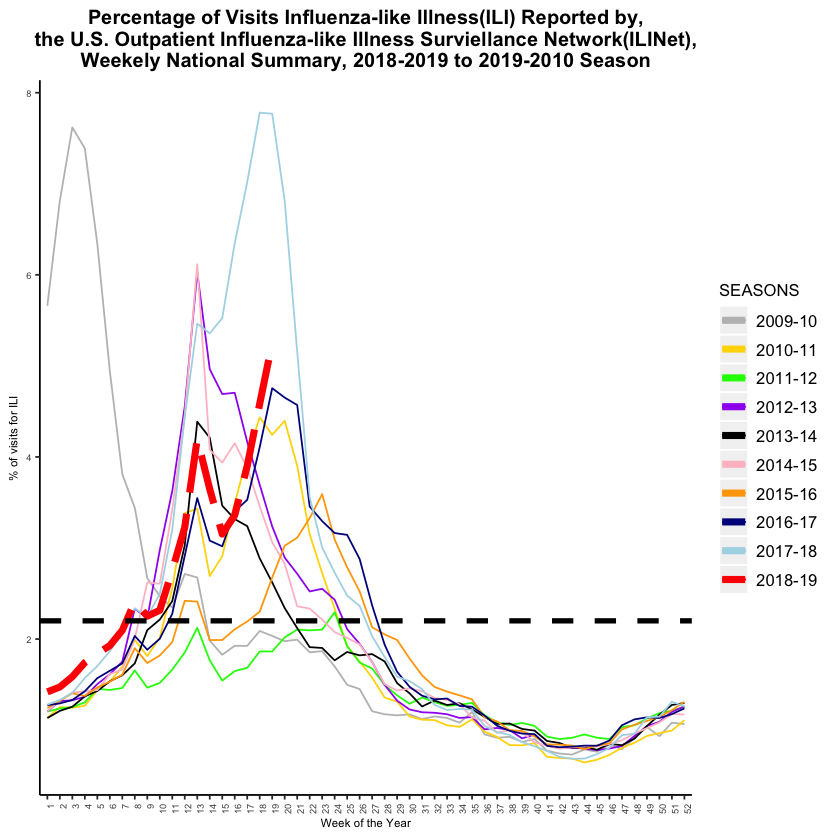

In [32]:
p <- ggplot(totaltry, aes(x = factor(totaltry$'seq(1, 52, by = 1)')))  

# Percentage Graph
p <- p + geom_line(aes(y = totaltry$X2009.10, colour = "2009-10"),  group = "1")
p <- p + geom_line(aes(y = totaltry$X2010.11, colour = "2010-11"),  group = "1")
p <- p + geom_line(aes(y = totaltry$X2011.12, colour = "2011-12"), group = "1")
p <- p + geom_line(aes(y = totaltry$X2012.13, colour = "2012-13"), group = "1")
p <- p + geom_line(aes(y = totaltry$X2013.14, colour = "2013-14"), group = "1")
p <- p + geom_line(aes(y = totaltry$X2014.15, colour = "2014-15"), group = "1")
p <- p + geom_line(aes(y = totaltry$X2015.16, colour = "2015-16"), group = "1")
p <- p + geom_line(aes(y = totaltry$X2016.17, colour = "2016-17"), group = "1")
p <- p + geom_line(aes(y = totaltry$X2017.18, colour = "2017-18"), group = "1")
p <- p + geom_line(aes(y = totaltry$X2018.19, colour = "2018-19"), group = "1",size = 2, linetype = "longdash")
p <- p + geom_hline(yintercept = 2.2, linetype = "dashed", color = "black", size = 1.5)

#Labels and colors
p <- p + scale_colour_manual("SEASONS", breaks = c("2009-10", "2010-11", "2011-12", "2012-13", "2013-14", "2014-15",
                                             "2015-16", "2016-17", "2017-18", "2018-19"),
                                 values = c("grey", "gold", "green", "purple", "black","pink", "orange", "darkblue",
                                        "lightblue","red"))
p <- p + labs(title = "Percentage of Visits Influenza-like Illness(ILI) Reported by,
the U.S. Outpatient Influenza-like Illness Surviellance Network(ILINet),
Weekely National Summary, 2018-2019 to 2019-2010 Season",
              y = "% of visits for ILI",x = "Week of the Year") 

#Themes
p <- p + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
               panel.background = element_blank(), axis.line = element_line(colour = "black"), 
               axis.text.x = element_text(angle = 90, hjust = 1))
p <- p + theme(plot.title = element_text(size = 12, face = "bold", hjust = 0.5) , legend.title=element_text(size=10),
                 legend.text=element_text(size=10), text = element_text(size=7))
p